In [1]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
# CM visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Model
from keras import Sequential
from keras.layers import Dense
from sklearn.externals import joblib

Using TensorFlow backend.


In [2]:
# Reading Data
df = pd.read_csv("bank_loan_data.csv")
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount'] * 1000).astype(int)
# Simple imbalance analysis
Counter(df['Loan_Status'])['Y'] / df['Loan_Status'].size
# Data wiht 'Y' for Loan Status make 70% of total observations
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


In [3]:
# One hot encoding
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis=1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))

In [4]:
# Using SMOTE to correct the imbalnces in the data set
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [5]:
# Spliting our data (80% for traning -- 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
# Building our model (Small Neural Network)
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim = X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

531/531 [==============================] - 0s 265us/step


[0.2536148306003398, 0.8888888955116272]

In [24]:
# Adding a limiter > 0.5 = loan approved
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.55)

[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

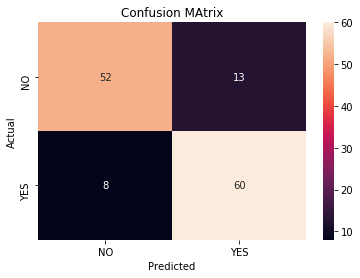

In [25]:
# We will use confussion to tweak the limiter
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) # annot : Cells annotations
ax.set_xlabel('Predicted');ax.set_ylabel('Actual')
ax.set_title('Confusion MAtrix')
ax.xaxis.set_ticklabels(['NO', 'YES']);
ax.yaxis.set_ticklabels(['NO', 'YES'])

In [11]:
# Pickling our model (Storing the model in a pickle dump)
filename = 'bank_loan_model.pkl'
filename2 = 'scalers.pkl'
joblib.dump(classifier, filename)
joblib.dump(X, filename2)

['scalers.pkl']